In [1]:
# Load libraries and mount Google Drive (if applicable)
import pandas as pd

# Load the CSV file // change the path
df = pd.read_csv(r"C:\vgsales.csv")

# Display the first 5 rows
df.head()

# Get the shape of the dataset
df.shape

# Summary statistics of the dataset
df.describe()

# Information about data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [2]:
# Drop rows with missing values
df = df.dropna()

# Verify the dataset after cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [3]:
# Sort values by Global_Sales in descending order and select the top record
highest_sales_game = df.sort_values('Global_Sales', ascending=False).head(1)
print(highest_sales_game)


   Rank        Name Platform    Year   Genre Publisher  NA_Sales  EU_Sales  \
0     1  Wii Sports      Wii  2006.0  Sports  Nintendo     41.49     29.02   

   JP_Sales  Other_Sales  Global_Sales  
0      3.77         8.46         82.74  


In [4]:
# Get unique platforms in the dataset
unique_platforms = df['Platform'].unique()
print(unique_platforms)


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [5]:
# Filter for PS4 games and sort by Global_Sales
ps4_top10 = df[df['Platform'] == 'PS4'].sort_values('Global_Sales', ascending=False).head(10)
print(ps4_top10)

# Add a combined sales column for Europe and Japan
df['eu_jp_sales'] = df['EU_Sales'] + df['JP_Sales']

# Top 10 PS4 games by EU + JP sales
ps4_top10_eu_jp = df[df['Platform'] == 'PS4'].sort_values('eu_jp_sales', ascending=False).head(10)
print(ps4_top10_eu_jp)


     Rank                            Name Platform    Year         Genre  \
33     34       Call of Duty: Black Ops 3      PS4  2015.0       Shooter   
44     45              Grand Theft Auto V      PS4  2014.0        Action   
77     78                         FIFA 16      PS4  2015.0        Sports   
92     93    Star Wars Battlefront (2015)      PS4  2015.0       Shooter   
93     94  Call of Duty: Advanced Warfare      PS4  2014.0       Shooter   
109   110                       Fallout 4      PS4  2015.0  Role-Playing   
124   125                         FIFA 15      PS4  2014.0        Sports   
154   155                         Destiny      PS4  2014.0       Shooter   
221   222                         FIFA 17      PS4  2016.0        Sports   
236   237                  The Last of Us      PS4  2014.0        Action   

                       Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
33                    Activision      5.77      5.81      0.35         2.31   
44   

In [13]:
# Filter for XOne games released in 2016
xbox_2016 = df[(df['Platform'] == 'XOne') & (df['Year'] == 2016)]

# Top-selling XOne game in Europe in 2016
top_eu_sales = xbox_2016.sort_values('EU_Sales', ascending=False)
print(top_eu_sales)


Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, eu_jp_sales]
Index: []


In [7]:
# Replace 'XOne' with 'X Box One'
df['Platform'].replace('XOne', 'X Box One', inplace=True)

# Verify the replacement
df.tail(30)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,eu_jp_sales
16568,16571,XI Coliseum,PSP,2006.0,Puzzle,Sony Computer Entertainment,0.00,0.00,0.01,0.0,0.01,0.01
16569,16572,Resident Evil 4 HD,X Box One,2016.0,Shooter,Capcom,0.01,0.00,0.00,0.0,0.01,0.00
16570,16573,Farming 2017 - The Simulation,PS4,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.0,0.01,0.01
16571,16574,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013.0,Adventure,Prototype,0.00,0.00,0.01,0.0,0.01,0.01
16572,16575,Scarlett: Nichijou no Kyoukaisen,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.0,0.01,0.01
16573,16576,Mini Desktop Racing,Wii,2007.0,Racing,Popcorn Arcade,0.01,0.00,0.00,0.0,0.01,0.00
16574,16577,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.0,0.01,0.01
16575,16578,Neo Angelique Special,PSP,2008.0,Adventure,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,0.01
16576,16579,Rugby Challenge 3,X Box One,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.0,0.01,0.01
16577,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.00,0.0,0.01,0.01


In [8]:
# Filter PC games with Global_Sales > 3
pc_high_sales = df[(df['Platform'] == 'PC') & (df['Global_Sales'] > 3)]

# Count the number of such games
print(len(pc_high_sales))

# Display the games
print(pc_high_sales)


12
     Rank                                    Name Platform    Year  \
83     84                              The Sims 3       PC  2009.0   
137   138                       World of Warcraft       PC  2004.0   
181   182                              Diablo III       PC  2012.0   
194   195              Microsoft Flight Simulator       PC  1996.0   
217   218          StarCraft II: Wings of Liberty       PC  2010.0   
267   268          Warcraft II: Tides of Darkness       PC  1995.0   
281   282                               Half-Life       PC  1997.0   
288   289  World of Warcraft: The Burning Crusade       PC  2007.0   
310   311             The Elder Scrolls V: Skyrim       PC  2011.0   
328   329                     The Sims: Unleashed       PC  2002.0   
353   354                  Doom II: Hell on Earth       PC  1994.0   
456   457                      The Sims: Vacation       PC  2002.0   

            Genre               Publisher  NA_Sales  EU_Sales  JP_Sales  \
83     Simu

In [14]:
# Filter for Action games
action_games = df[df['Genre'] == 'Action']

# Find the Action game with the highest global sales
top_action_game = action_games.sort_values('Global_Sales', ascending=False)
print(top_action_game)


        Rank                                               Name Platform  \
16        17                                 Grand Theft Auto V      PS3   
17        18                      Grand Theft Auto: San Andreas      PS2   
23        24                                 Grand Theft Auto V     X360   
24        25                        Grand Theft Auto: Vice City      PS2   
38        39                               Grand Theft Auto III      PS2   
...      ...                                                ...      ...   
16167  16170                                         Order Up!!      3DS   
16158  16161                      Monkey Madness: Island Escape       DS   
16151  16154                     SoulCalibur Legends (JP sales)      Wii   
16147  16150                           Chokkan! Asonde Relaxuma       DS   
16589  16592  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV   

         Year   Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
16     201

        Rank  Name  Platform  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
Year                                                                           
2009.0  1431  1431      1431   1431       1431      1431      1431      1431   
2008.0  1428  1428      1428   1428       1428      1428      1428      1428   
2010.0  1257  1257      1257   1257       1257      1257      1257      1257   
2007.0  1201  1201      1201   1201       1201      1201      1201      1201   
2011.0  1136  1136      1136   1136       1136      1136      1136      1136   
2006.0  1008  1008      1008   1008       1008      1008      1008      1008   
2005.0   936   936       936    936        936       936       936       936   
2002.0   829   829       829    829        829       829       829       829   
2003.0   775   775       775    775        775       775       775       775   
2004.0   744   744       744    744        744       744       744       744   
2012.0   655   655       655    655     

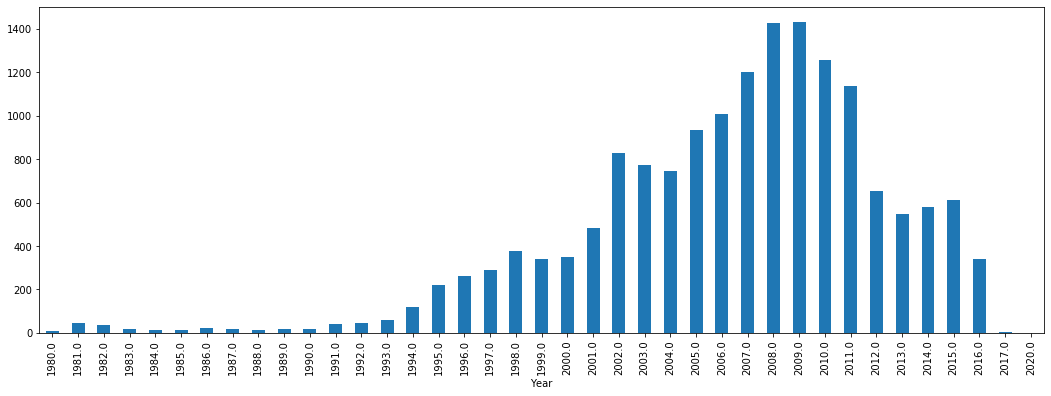

In [16]:
# Count games by year and sort in descending order
games_by_year = df.groupby('Year').count().sort_values(['Name'], ascending=False)
print(games_by_year)

# Bar plot for the count of games by year
df.groupby('Year').count()['Name'].plot.bar(figsize=(18,6))
None


In [17]:
# Filter for games released in 2009
df_2009 = df[df['Year'] == 2009]

# Count games by platform in 2009
platform_2009 = df_2009.groupby('Platform').count().sort_values(['Name'], ascending=False)
print(platform_2009)


          Rank  Name  Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
Platform                                                                     
DS         405   405   405    405        405       405       405       405   
Wii        325   325   325    325        325       325       325       325   
X360       173   173   173    173        173       173       173       173   
PS3        162   162   162    162        162       162       162       162   
PSP        161   161   161    161        161       161       161       161   
PC         109   109   109    109        109       109       109       109   
PS2         96    96    96     96         96        96        96        96   

          Other_Sales  Global_Sales  eu_jp_sales  
Platform                                          
DS                405           405          405  
Wii               325           325          325  
X360              173           173          173  
PS3               162           162       

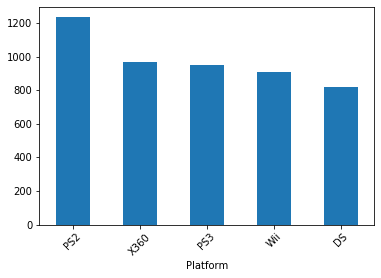

In [18]:
# Sum global sales by platform and sort in descending order
top_5_platforms = df.groupby('Platform').sum().sort_values('Global_Sales', ascending=False).head(5)

# Bar plot for the top 5 platforms
top_5_platforms['Global_Sales'].plot.bar(rot=45)


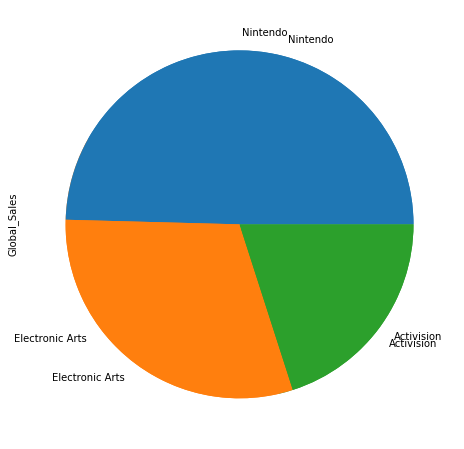

In [19]:
# Sum EU sales by publisher and sort in descending order
top_3_publishers = df.groupby('Publisher').sum().sort_values('EU_Sales', ascending=False).head(3)

# Pie plot for the top 3 publishers by EU sales
top_3_publishers['EU_Sales'].plot.pie(figsize=(8, 8))

# Compare with Global Sales using a pie plot
top_3_publishers['Global_Sales'].plot.pie(figsize=(8, 8))



Top genres in 2014:
              Rank  Name  Platform  Year  Publisher  NA_Sales  EU_Sales  \
Genre                                                                     
Action         186   186       186   186        186       186       186   
Role-Playing    90    90        90    90         90        90        90   
Adventure       75    75        75    75         75        75        75   
Sports          55    55        55    55         55        55        55   
Shooter         47    47        47    47         47        47        47   

              JP_Sales  Other_Sales  Global_Sales  eu_jp_sales  
Genre                                                           
Action             186          186           186          186  
Role-Playing        90           90            90           90  
Adventure           75           75            75           75  
Sports              55           55            55           55  
Shooter             47           47            47           47 

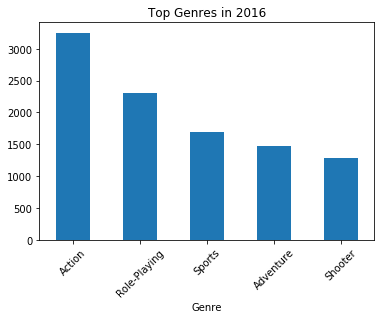

In [21]:
# Count games by genre
top_genres = df.groupby('Genre').count().sort_values(['Name'], ascending=False).head(5)

# Bar plot for top genres
top_genres['Name'].plot.bar(rot=45)

# Filter by year and compare genres
df_2014 = df[df['Year'] == 2014]
df_2014.head()

top_genres_2014 = df_2014.groupby('Genre').count().sort_values(['Name'], ascending = False).head()
top_genres_2014

top_genres_2014['Name'].plot.bar(rot = 45)

for year in [2014, 2015, 2016]:
    print(f"\nTop genres in {year}:")
    df_year = df[df['Year'] == year]
    top_genres_year = df_year.groupby('Genre').count().sort_values('Name', ascending=False).head()
    print(top_genres_year)
    top_genres_year['Name'].plot.bar(rot=45, title=f"Top Genres in {year}")


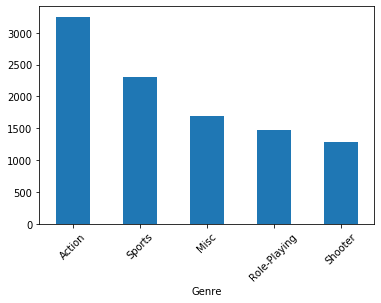

In [22]:
top_genres['Name'].plot.bar(rot=45)

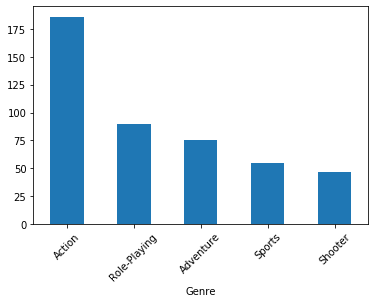

In [23]:
top_genres_2014['Name'].plot.bar(rot = 45)